# import libraries

In [1]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

# Read data

In [2]:
data_Nans = pd.read_csv(r'C:\Users\Lenovo\Anaconda3\projects\house_prices_data_training_data.csv')
data_withoutNans = data_Nans.dropna()
print("Size before filtering = {} ".format(data_withoutNans.shape))
data_withoutNans

Size before filtering = (17999, 21) 


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7.129301e+09,20141013T000000,221900.0,3.0,1.00,1180.0,5650.0,1.0,0.0,0.0,...,7.0,1180.0,0.0,1955.0,0.0,98178.0,47.5112,-122.257,1340.0,5650.0
1,6.414100e+09,20141209T000000,538000.0,3.0,2.25,2570.0,7242.0,2.0,0.0,0.0,...,7.0,2170.0,400.0,1951.0,1991.0,98125.0,47.7210,-122.319,1690.0,7639.0
2,5.631500e+09,20150225T000000,180000.0,2.0,1.00,770.0,10000.0,1.0,0.0,0.0,...,6.0,770.0,0.0,1933.0,0.0,98028.0,47.7379,-122.233,2720.0,8062.0
3,2.487201e+09,20141209T000000,604000.0,4.0,3.00,1960.0,5000.0,1.0,0.0,0.0,...,7.0,1050.0,910.0,1965.0,0.0,98136.0,47.5208,-122.393,1360.0,5000.0
4,1.954401e+09,20150218T000000,510000.0,3.0,2.00,1680.0,8080.0,1.0,0.0,0.0,...,8.0,1680.0,0.0,1987.0,0.0,98074.0,47.6168,-122.045,1800.0,7503.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17994,6.414100e+09,20150108T000000,320000.0,2.0,1.00,1802.0,11225.0,1.0,0.0,0.0,...,7.0,1802.0,0.0,1961.0,0.0,98125.0,47.7205,-122.323,1810.0,7332.0
17995,1.346300e+09,20140626T000000,1990000.0,5.0,3.00,4480.0,5000.0,2.5,0.0,0.0,...,12.0,3420.0,1060.0,1902.0,0.0,98112.0,47.6275,-122.315,3220.0,5600.0
17996,2.212210e+09,20140702T000000,253000.0,2.0,1.00,1310.0,7128.0,1.0,0.0,0.0,...,7.0,940.0,370.0,1980.0,0.0,98031.0,47.3958,-122.189,1400.0,7161.0
17997,2.050004e+08,20140915T000000,630000.0,3.0,2.50,2320.0,32772.0,2.0,0.0,0.0,...,9.0,2320.0,0.0,1992.0,0.0,98053.0,47.6304,-121.988,2610.0,33305.0


# Drop features

In [3]:
data = data_withoutNans.drop(["id","date","bedrooms","lat","sqft_basement","sqft_lot","floors","waterfront","condition","yr_built","yr_renovated","zipcode","long","sqft_lot15"] ,  axis = 1)
print("Size before filtering = {} ".format(data.shape))
data

Size before filtering = (17999, 7) 


,price,bathrooms,sqft_living,view,grade,sqft_above,sqft_living15
0,221900.0,1.00,1180.0,0.0,7.0,1180.0,1340.0
1,538000.0,2.25,2570.0,0.0,7.0,2170.0,1690.0
2,180000.0,1.00,770.0,0.0,6.0,770.0,2720.0
3,604000.0,3.00,1960.0,0.0,7.0,1050.0,1360.0
4,510000.0,2.00,1680.0,0.0,8.0,1680.0,1800.0
...,...,...,...,...,...,...,...
17994,320000.0,1.00,1802.0,0.0,7.0,1802.0,1810.0
17995,1990000.0,3.00,4480.0,0.0,12.0,3420.0,3220.0
17996,253000.0,1.00,1310.0,0.0,7.0,940.0,1400.0
17997,630000.0,2.50,2320.0,0.0,9.0,2320.0,2610.0


# Separating Features X and the prices Y

In [4]:
Data_array = data.to_numpy()
X = Data_array[:,1:]
Y = Data_array[:,0]
print("Size of features array = {} ".format(X.shape))
print("Size of output array = {} ".format(Y.shape))

Size of features array = (17999, 6) 
Size of output array = (17999,) 


# Dividing data into Trainning, validation and test

In [5]:
# Dividing into 60% Trainning set and 40% the rest.
X_train, X_rest, Y_train, Y_rest = train_test_split(X, Y, test_size = 0.4, shuffle = False) 

# Dividing the remaining 40% into 20% Testing set and 20% validation set.
X_validation , X_test, Y_validation, Y_test = train_test_split(X_rest, Y_rest, test_size = 0.5, shuffle = False)

# Normalization function

In [6]:
def featureNormalize(X):
    
    X_norm = X.copy()
    mu = np.zeros(X.shape[0])
    sigma = np.zeros(X.shape[0])
    
    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma
    
    return X_norm, mu, sigma

In [7]:
X_train_norm,mu,sigma = featureNormalize(X_train)
X_test_norm = (X_test - mu)/sigma
X_validation_norm = (X_validation - mu)/sigma

# Adding intercept term to our features X(0)

In [8]:
Y_train_size = Y_train.size
Y_validation_size = Y_validation.size
Y_test_size = Y_test.size

X_train_norm = np.concatenate( [np.ones((Y_train_size, 1)), X_train_norm], axis=1 )
X_test_norm = np.concatenate( [np.ones((Y_test_size, 1)), X_test_norm], axis=1 )
X_validation_norm = np.concatenate( [np.ones((Y_validation_size, 1)), X_validation_norm], axis=1 )

print("Size of Y_train = {}".format(Y_train.shape))
print("Size of X_train_norm = {}".format(X_train_norm.shape))

print("Size of Y_test = {}".format(Y_test.shape))
print("Size of X_test_norm = {}".format(X_test_norm.shape))

print("Size of Y_validation = {}".format(Y_validation.shape))
print("Size of X_validation_norm = {}".format(X_validation_norm.shape))

Size of Y_train = (10799,)
Size of X_train_norm = (10799, 7)
Size of Y_test = (3600,)
Size of X_test_norm = (3600, 7)
Size of Y_validation = (3600,)
Size of X_validation_norm = (3600, 7)


# Cost function_Regularized

In [9]:
#Compute cost for linear regression with multiple variables

def computeCostMulti(X, y, theta, lambda_):
    
    m = y.shape[0]
    J = 0
    thetaa = theta.copy()
    thetaa[0] = 0
    J= ((1/(2*m)) * np.dot(np.transpose(np.dot(X,theta)-y),np.dot(X,theta)-y)) + ((lambda_ / (2 * m)) * np.sum(np.square(thetaa)))

    return J

# Gradient decent function

In [10]:
#Performs gradient descent to learn theta.
def gradientDescentMulti(X, y, theta, alpha, num_iters,lambda_):
    
    m = y.shape[0]
    theta = theta.copy()
    J_history = []
    X = np.array(X)

    for i in range(num_iters):
        
        hypothesis= np.dot(X,theta)
        theta=theta- ((alpha/m)* ( (np.dot(hypothesis-y,X))  +  (lambda_*theta) )) 

        J_history.append(computeCostMulti(X, y, theta,lambda_))
        
    return theta, J_history

Theta calculated from gradient descent function: 
 [531815.52682995 -28320.97338826 193504.25813232  72535.31076754
 108379.361661   -20003.38375376   2678.73740879]


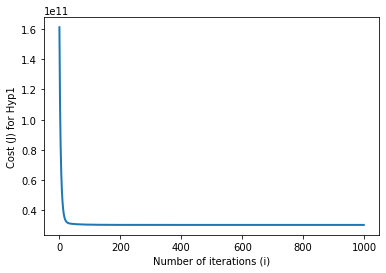

In [11]:
α_hyp1 = 0.1
lambda_ = 0.5
#Random
iterations_hyp1 = 1000

# For our 6 features
theta_hyp1 = np.zeros(7)


#Gradient decent function call
theta_hyp1, J_history_hyp1 = gradientDescentMulti(X_train_norm, Y_train, theta_hyp1, α_hyp1, iterations_hyp1,lambda_ )

# Plot the convergence graph
pyplot.plot(np.arange(len(J_history_hyp1)), J_history_hyp1, lw=2)
pyplot.xlabel('Number of iterations (i)')
pyplot.ylabel('Cost (J) for Hyp1')

# Display the thetas
print("Theta calculated from gradient descent function: \n {:s}".format(str(theta_hyp1)))

# Display the cost 
#print("Cost calculated from gradient descent function: \n {:s}".format(str(J_history_hyp1)))

# Cost Function without Reg

In [12]:
#Compute cost for linear regression with multiple variables

def computeCostMulti_withoutReg(X, y, theta):
    
    m = y.shape[0]
    J = 0

    J= (1/(2*m)) * np.dot(np.transpose(np.dot(X,theta)-y),np.dot(X,theta)-y)

    return J

# Validation data cost for 1st hypthesis

In [13]:
J_validation_hyp1=computeCostMulti_withoutReg(X_validation_norm, Y_validation, theta_hyp1)

print("Cost of validation data for hyp1 : {}".format(J_validation_hyp1))


Cost of validation data for hyp1 : 26708677953.223972


# Train data cost for 1st hypthesis

In [14]:
J_train_hyp1=computeCostMulti_withoutReg(X_train_norm, Y_train, theta_hyp1)

print("Cost of train data for hyp1 : {}".format(J_train_hyp1))


Cost of train data for hyp1 : 30370607662.563126


# Test data cost for 1st hypthesis

In [15]:
J_test_hyp1=computeCostMulti_withoutReg(X_test_norm, Y_test, theta_hyp1)

print("Cost of test data for hyp1 : {}".format(J_test_hyp1))


Cost of test data for hyp1 : 24851495634.03272
